In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
par = {'kHK_PFK': 3.2,
             'kP2GM': 1500,
             'kP2Gase': 0.15,
             'kPGK': 1.57*(10**4),
             'kPK': 559,
             'kATPase': 1.46,
             'nH': 4.0,
             'KIATP': 1.0,
             'qAK': 2.0,
             'A': 1.5,
             'kplusAK':2,
             'kminusAK':1
             }

In [3]:
def Integration(x0):
    Integ = scipy.integrate.ode(Konzentration).set_integrator('lsoda').set_initial_value(x0,0)         #ODE ist name der Gleichung # lsoda gibt eine gute Lösung vor wie er es berechnet #x0 erster wert mit dem ich beginne
    return Integ                                                                             #lasse mir es dann ausgeben

def timeCourse(t,x0):
    integrator = Integration(x0)                                                             #benutze diese Funktion in meiner Funktion. 
    array = [x0]
    cnt = 1                                                                                  #counter
    while cnt < len(t):                                                                      #in meiner schleife gehe ich meine zeiten durch, er soll sagen wie groß der ist und soll es dann in mein array tun
        array.append( integrator.integrate(t[cnt]))                                          # funktion bracuh zeit wert und greift auf den Zeitwert von meinem counter zu . also pro Zeitpunkt neuen wert 
        
        cnt+=1
    return array

In [4]:
def simtillsteadystate2(x0,AbsTol=1e-8,t0=0,step=0.1):
        T = t0
        integrator = Integration(x0)
        err = np.linalg.norm(x0,ord=2)
        cnt=1
        while integrator.successful() and err > AbsTol:
            x0_n = integrator.integrate(T+step)
            T+=step
            err=np.linalg.norm(x0_n-x0,ord=2)
            x0=x0_n
            cnt+=1
            
        return [x0,T]

def simtillsteadystate(x0,AbsTol=1e-8,t0=0,step=0.1):#,maxt=100000000000000):
        T = t0
        integrator = Integration(x0)
        err = np.linalg.norm(x0,ord=2)
        cnt=1
        while integrator.successful() and err > AbsTol:# and cnt<=maxt:
            x0_n = integrator.integrate(T+step)
            T+=step
            err=np.linalg.norm(x0_n-x0,ord=2)
            x0=x0_n
            cnt+=1
            
        return [x0,T]

In [5]:
def vHK_PFK(ATP):
    return (par['kHK_PFK'] * ATP)/(1 + (ATP/par['KIATP'])**par['nH'])

def vP2GM(P13G):
    return par['kP2GM'] * P13G

def vP2Gase(P23G):
    return par['kP2Gase'] * P23G

def vPGK(P13G,ADP):
    return par['kPGK']*P13G*ADP

def vPK(PEP,ADP):
    return par['kPK'] * PEP * ADP

def vAK(ATP,AMP,ADP):
    return par['kplusAK']* AMP * ATP - par['kminusAK'] * (ADP)**2

def vATPase(ATP):
    return par['kATPase'] * ATP

In [6]:
def Konzentration(t,Sub):
    P13G,P23G,PEP,AMP,ADP,ATP = Sub
    
    dP13G = 2*vHK_PFK(ATP)-vP2GM(P13G)-vPGK(P13G,ADP)

    dP23G = vP2GM(P13G)-vP2Gase(P23G)

    dPEP = vP2Gase(P23G)+vPGK(P13G,ADP)-vPK(PEP,ADP)

    dAMP = -vAK(AMP,ATP,ADP)

    dADP = 2*vHK_PFK(ATP)-vPGK(P13G,ADP)-vPK(PEP,ADP)+ vATPase(ATP)+2*vAK(AMP,ATP,ADP)

    dATP = -2*vHK_PFK(ATP)+vPGK(P13G,ADP)+vPK(PEP,ADP)-vATPase(ATP)-vAK(AMP,ATP,ADP)
    
    return [dP13G,dP23G,dPEP,dAMP,dADP,dATP]

No handles with labels found to put in legend.


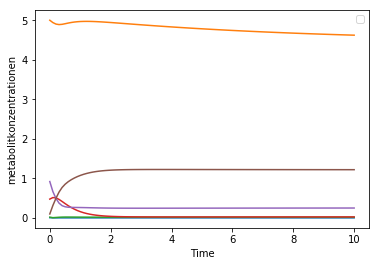

In [7]:
X0 = [0.005,5.,0.02,0.476,0.92,0.1]

T = np.linspace(0,10,100)

results = timeCourse(T,X0)



plt.plot(T,results)
plt.xlabel('Time')
plt.ylabel('metabolitkonzentrationen')
plt.legend(loc = 'best')
plt.show()

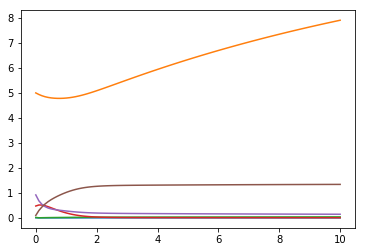

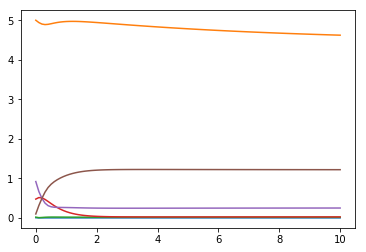

keine Uebereinstimmung 1
keine Uebereinstimmung 2
keine Uebereinstimmung 3
keine Uebereinstimmung 4
keine Uebereinstimmung 5
keine Uebereinstimmung 6
keine Uebereinstimmung 7
keine Uebereinstimmung 8
keine Uebereinstimmung 9
keine Uebereinstimmung 10
keine Uebereinstimmung 11
keine Uebereinstimmung 12
keine Uebereinstimmung 13
keine Uebereinstimmung 14
keine Uebereinstimmung 15
keine Uebereinstimmung 16
keine Uebereinstimmung 17
keine Uebereinstimmung 18
keine Uebereinstimmung 19
keine Uebereinstimmung 20
keine Uebereinstimmung 21
keine Uebereinstimmung 22
keine Uebereinstimmung 23
keine Uebereinstimmung 24
keine Uebereinstimmung 25
keine Uebereinstimmung 26
keine Uebereinstimmung 27
keine Uebereinstimmung 28
keine Uebereinstimmung 29
keine Uebereinstimmung 30
keine Uebereinstimmung 31
keine Uebereinstimmung 32
keine Uebereinstimmung 33
keine Uebereinstimmung 34
keine Uebereinstimmung 35
keine Uebereinstimmung 36
keine Uebereinstimmung 37
keine Uebereinstimmung 38
keine Uebereinstimmun

In [8]:
par['nH']= 1.0
t = np.linspace(0,10,100)

nh_eins = timeCourse(t,[0.005,5.,0.02,0.476,0.92,0.1])

plt.plot(t,nh_eins)
plt.show()


par['nH']= 4.0
t = np.linspace(0,10,100)

nh_vier = timeCourse(t,[0.005,5.,0.02,0.476,0.92,0.1])

plt.plot(t,nh_vier)
plt.show()


    
x = [0.005,5.,0.02,0.476,0.92,0.1]

steady = simtillsteadystate(x0=x)
    


hks = np.linspace(0,5,1000)
stepp = 0

for i in hks:
    stepp += 1
    par['kHK_PFK'] = i
    steady_neu = simtillsteadystate(x0=x)
    if (steady_neu[0][1]/steady[0][1])<= 1.1 and (steady_neu[0][1]/steady[0][1])>= 0.9:
        print(steady_neu, i)
        break
    else:
        print('keine Uebereinstimmung',stepp)
        
        
par['nH']=1.0    
hks = np.linspace(2,3,1000)
stepp = 0

for i in hks:
    stepp += 1
    par['kHK_PFK'] = i
    steady_neu = simtillsteadystate(x0=x)
    if (steady_neu[0][1] - steady[0][1])**2<= 0.00001 and (steady_neu[0][1] - steady[0][1])**2 >= 0:
        print(steady_neu, i)
        break
    else:
        print('keine Uebereinstimmung',stepp)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


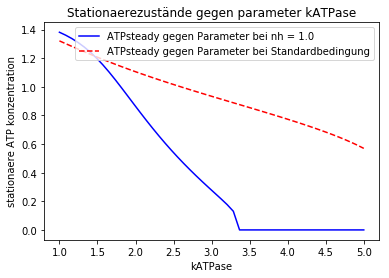

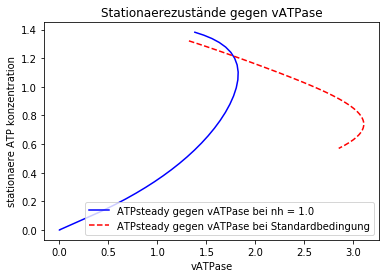

In [9]:
#Aufgabe d)
kATPase = np.linspace(1,5,50)
par['nH'] = 1.0
par ['kHK_PFK'] = 2.2262262262262262
steady_ATP_1 = []
vATP_bei_1 =[]

step = 0
for i in kATPase:
    par['kATPase'] = i
    steady_neu = simtillsteadystate(x0=x)
    steady_ATP_1.append(steady_neu[0][-1])
    vATP_bei_1.append(vATPase(steady_neu[0][-1]))
    step += 1
    print(step)


par['nH'] = 4.0
par ['kHK_PFK'] = 3.2
steady_ATP_4 = []
vATP_bei_4 =[]

for i in kATPase:
    par['kATPase'] = i
    steady_neu = simtillsteadystate(x0=x)
    steady_ATP_4.append(steady_neu[0][-1])
    vATP_bei_4.append(vATPase(steady_neu[0][-1]))
    
plt.plot(kATPase, steady_ATP_1, '-b',label = r'ATPsteady gegen Parameter bei nh = 1.0')
plt.plot(kATPase, steady_ATP_4, '--r',label = r'ATPsteady gegen Parameter bei Standardbedingung')
plt.xlabel('kATPase')
plt.ylabel('stationaere ATP konzentration')
plt.title('Stationaerezustände gegen parameter kATPase')
plt.legend()
plt.show()


plt.plot(vATP_bei_1 , steady_ATP_1, '-b',label = r'ATPsteady gegen vATPase bei nh = 1.0')
plt.plot(vATP_bei_4, steady_ATP_4, '--r',label = r'ATPsteady gegen vATPase bei Standardbedingung')
plt.title('Stationaerezustände gegen vATPase')
plt.xlabel('vATPase')
plt.ylabel('stationaere ATP konzentration')
plt.legend()
plt.show()
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


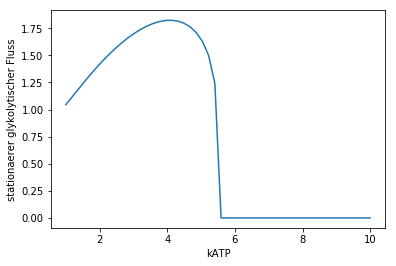

In [10]:
#aufgabe e)
kATPase = np.linspace(1,10,50)
par['nH'] = 4.0
par ['kHK_PFK'] = 3.2
steady_ATP_1 = []
vHK_ATP =[]

step = 0
for i in kATPase:
    par['kATPase'] = i
    steady_neu = simtillsteadystate(x0=x)
    vHK_ATP.append(vHK_PFK(steady_neu[0][-1]))
    step += 1
    print(step)

plt.plot(kATPase,vHK_ATP)
plt.xlabel('kATP')
plt.ylabel('stationaerer glykolytischer Fluss')
plt.show()

In [12]:
#aufgabe f)

def Flusskontrollkoeffizienten(parameter,x0=[0.005,5.,0.02,0.476,0.92,0.1], variation = 0.01):
    Wert = par[parameter]
    par[parameter] = Wert*(1-variation)
    kHKklein = simtillsteadystate(x0)[0]
    par[parameter]= Wert*(1+variation)
    kHKgroß = simtillsteadystate(x0)[0]
    par[parameter]= Wert
    kHKstandard = simtillsteadystate(x0)[0]
    
    P13G_99,P23G_99,PEP_99,AMP_99,ADP_99,ATP_99 = kHKklein
    P13G_1,P23G_1,PEP_1,AMP_1,ADP_1,ATP_1 = kHKgroß
    P13G_stan,P23G_stan,PEP_stan,AMP_stan,ADP_stan,ATP_stan = kHKstandard
    

    Fluss_vHK_neu_kHK = ((vHK_PFK(ATP_99)-vHK_PFK(ATP_1))/vHK_PFK(ATP_stan))/(2*variation)
    
    Fluss_vP2GM_neu_kHK = ((vP2GM(P13G_99)-vP2GM(P13G_1))/vP2GM(P13G_stan))/(2*variation)
    
    Fluss_vP2Gase_neu_kHK = ((vP2Gase(P23G_99)-vP2Gase(P23G_1))/vP2Gase(P23G_stan))/(2*variation)
    
    Fluss_vPGK_neu_kHK = ((vPGK(P13G_99,ADP_99)-vPGK(P13G_1,ADP_1))/vPGK(P13G_stan,ADP_stan))/(2*variation)
    
    Fluss_vPK_neu_kHK = ((vPK(PEP_99,ADP_99)-vPK(PEP_1,ADP_1))/vPK(PEP_stan,ADP_stan))/(2*variation)
    
    Fluss_vATPase_neu_kHK = ((vATPase(ATP_99)-vATPase(ATP_1))/vATPase(ATP_stan))/(2*variation)    
    return [Fluss_vHK_neu_kHK,Fluss_vP2GM_neu_kHK,Fluss_vP2Gase_neu_kHK,Fluss_vPGK_neu_kHK,Fluss_vPK_neu_kHK,Fluss_vATPase_neu_kHK]


Parameter = ['kHK_PFK', 'kP2GM', 'kP2Gase', 'kPGK', 'kPK', 'kATPase']

alle_Fluss = []

for i in Parameter:
    alle_Fluss.append(Flusskontrollkoeffizienten(i))



vHK_Fluss = 0
for j in list(range(6)):
    vHK_Fluss += alle_Fluss[j][0]
print(vHK_Fluss)
    
kP2GM_Fluss = 0
for j in list(range(6)):
    kP2GM_Fluss += alle_Fluss[j][1]
print(kP2GM_Fluss)

kP2Gase_Fluss = 0
for j in list(range(6)):
    kP2Gase_Fluss += alle_Fluss[j][2]
print(kP2Gase_Fluss)

kPGK_Fluss = 0
for j in list(range(6)):
    kPGK_Fluss += alle_Fluss[j][3]
print(kPGK_Fluss)

kPK_Fluss = 0
for j in list(range(6)):
    kPK_Fluss += alle_Fluss[j][4]
print(kPK_Fluss)

kATPase_Fluss = 0
for j in list(range(6)):
    kATPase_Fluss += alle_Fluss[j][5]
print(kATPase_Fluss)


0.6577903223757735
0.6581454730535137
0.6604526271466504
0.600964899403276
0.6614228213211379
0.6577903223758053
